In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
dataset=pd.read_csv('placement.csv')

In [3]:
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 18.5+ KB


In [5]:
dataset.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [6]:
dataset.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
dataset.salary.fillna(0,inplace=True)

In [8]:
dataset.isna().sum()


sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

(array([139.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  76.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

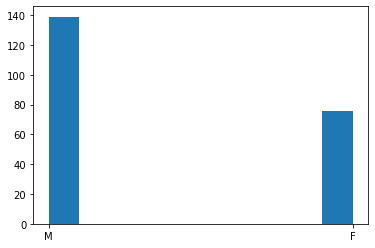

In [9]:
plt.hist(dataset.gender)

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


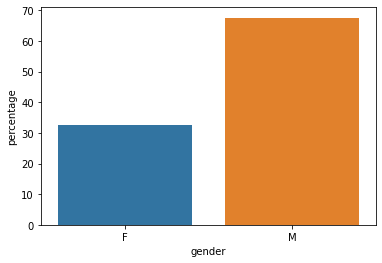

In [10]:
placed_count = dataset[dataset.status=='Placed'].groupby('gender').agg({'status':'count'})
placed_count['percentage'] = 100 * placed_count.status/placed_count.status.sum()
sns.barplot(placed_count.index,placed_count.percentage)
plt.show()

In [11]:
X=dataset.copy()
y=dataset.status
X.drop(['sl_no','salary','status'],axis=1,inplace=True)

In [12]:
s=(X.dtypes=='object')
object_cols=list(s[s].index)

In [13]:
label_encoder=LabelEncoder()
for col in object_cols:
    X[col]=label_encoder.fit_transform(X[col])

In [14]:
Y = y.map({'Not Placed':0,'Placed':1})
Y.value_counts()

1    148
0     67
Name: status, dtype: int64

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10,stratify=Y)

In [16]:
y_train.value_counts()

Placed        111
Not Placed     50
Name: status, dtype: int64

In [17]:
training_set = pd.concat([X_train, y_train], axis=1)

In [18]:
class0 = training_set[training_set.status == 0]
class1 = training_set[training_set.status == 1]

In [19]:
from imblearn.over_sampling import SMOTE
stom = SMOTE(random_state=42)
stom_x_train, stom_y_train = stom.fit_resample(X_train, y_train)
stom_x_train = pd.DataFrame(stom_x_train, columns = X_train.columns)
stom_y_train = pd.DataFrame(stom_y_train, columns = ['status'])

In [20]:
stom_y_train.value_counts()

status    
Not Placed    111
Placed        111
dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_ss = ss.fit_transform(stom_x_train)
X_test_ss = ss.transform(X_test)

# LOGISTIC REGRESSION

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_ss,stom_y_train.values.ravel())
Y_pred=lr.predict(X_test_ss)
# Evaluation
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

  Not Placed       0.70      0.82      0.76        17
      Placed       0.91      0.84      0.87        37

    accuracy                           0.83        54
   macro avg       0.81      0.83      0.81        54
weighted avg       0.85      0.83      0.84        54



# RANDOM FOREST  ACCURACY:93%

In [23]:
from sklearn.ensemble import RandomForestClassifier
lr = RandomForestClassifier()
lr.fit(X_train_ss,stom_y_train.values.ravel())
Y_pred=lr.predict(X_test_ss)
# Evaluation
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

  Not Placed       0.93      0.82      0.87        17
      Placed       0.92      0.97      0.95        37

    accuracy                           0.93        54
   macro avg       0.93      0.90      0.91        54
weighted avg       0.93      0.93      0.92        54



# K-NEAREST NIEGHBOR

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=19,metric='minkowski')
knn.fit(X_train_ss,stom_y_train.values.ravel())
Y_pred=knn.predict(X_test_ss)
# Evaluation
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

  Not Placed       0.65      0.88      0.75        17
      Placed       0.94      0.78      0.85        37

    accuracy                           0.81        54
   macro avg       0.79      0.83      0.80        54
weighted avg       0.85      0.81      0.82        54

